<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/Lecture/18_TFKeras_LSTM_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 예제 : 감성 분석 Sentiment Analysis

- 입력된 자연어 안의 주관적 의견, 감정 등을 찾아내는 문제

- 이중 문장의 긍정/부정 등을 구분하는 경우가 많다.

- dataset: https://github.com/e9t/nsmc

    - 네이버 영화 리뷰에 대한 데이터로 평점 3점 이상이면 긍정, 미만이면 부정으로 labeling되어 있다.

In [1]:
path_to_train_file = "/content/drive/MyDrive/zero-base DS/ratings_train.txt"
path_to_test_file = "/content/drive/MyDrive/zero-base DS/ratings_test.txt"

with open(path_to_train_file, 'rb') as f:
    train_text = f.read().decode(encoding='utf-8')

with open(path_to_test_file, 'rb') as f:
    test_text = f.read().decode(encoding='utf-8')

print('Length of Train text: {} characters'.format(len(train_text)))
print('Length of  Test text: {} characters'.format(len(test_text)))

Length of Train text: 6937271 characters
Length of  Test text: 2318260 characters


In [2]:
print(train_text[:300])

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [3]:
train_text[:300]

'id\tdocument\tlabel\n9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0\n3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1\n10265843\t너무재밓었다그래서보는것을추천한다\t0\n9045019\t교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정\t0\n6483659\t사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다\t1\n5403919\t막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.\t0\n7797314\t원작의'

In [4]:
train_text[:300].split('\n')

['id\tdocument\tlabel',
 '9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0',
 '3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1',
 '10265843\t너무재밓었다그래서보는것을추천한다\t0',
 '9045019\t교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정\t0',
 '6483659\t사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다\t1',
 '5403919\t막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.\t0',
 '7797314\t원작의']

In [5]:
train_text.split('\n')[:3]

['id\tdocument\tlabel',
 '9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0',
 '3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1']

In [6]:
train_text.split('\n')[3]

'10265843\t너무재밓었다그래서보는것을추천한다\t0'

In [7]:
train_text.split('\n')[3].split('\t')

['10265843', '너무재밓었다그래서보는것을추천한다', '0']

In [8]:
import numpy as np

# label data
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


- cleaning은 불필요한 기호를 제거하는 것을 의미한다.

In [9]:
import re

# cleaning 함수 정의
def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \(", string)
    string = re.sub(r"\)", " \)", string)
    string = re.sub(r"\?", " \?", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

In [10]:
# 훈련용 데이터

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


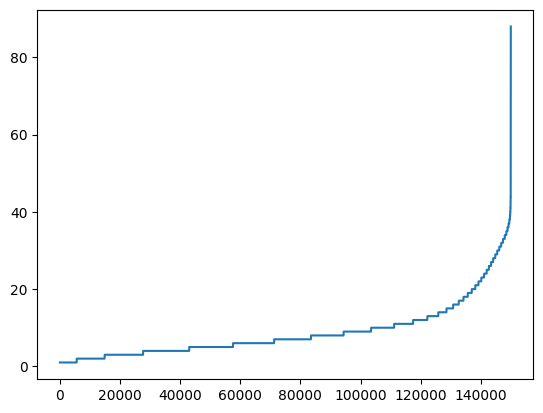

In [11]:
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()

plt.plot(sentence_len)
plt.show()

- 데이터 크기 맞추기

    <img src="https://github.com/ElaYJ/supplement/assets/153154981/14b72ce5-83e8-418c-a76c-02909afc6628" width="57%">

In [12]:
print(sum([int(l<=25) for l in sentence_len]))

142694


In [13]:
print(sum([int(l<=40) for l in sentence_len]))

149854


In [14]:
# 적당히 정제

sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])

for i in range(5):
    print(sentences_new[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


- tokenization은 자연어를 처리 가능한 최소의 단위로 나누는 것 --> 이번 예제에서는 띄어쓰기로 한다.

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 토크나이징과 패딩
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences_new)

train_X = tokenizer.texts_to_sequences(sentences_new)
train_X = pad_sequences(train_X, padding='post')
print(train_X[:5])

[[   25   875     8  6083  1107     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  590  5791  6695     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   69   345    31    35 10453     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5336     4     2  2167   865   575     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


- 임베딩 레이어

    <img src="https://github.com/ElaYJ/supplement/assets/153154981/d8c041fc-d935-4849-a0b1-1f69575ebd64" width="57%"><br></br>

    - 'boy'에 n-gram=2 방식을 적용하면...

        'bo', 'by', 'oy',

        'ob', 'yb', 'yo' 가 된다.

In [16]:
import tensorflow as tf

# 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
]) #--> Dense(2): 부정이면 (0, 1), 긍정이면 (1, 0)으로, So 'softmax' 적용

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 300)           6000000   
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 6070302 (23.16 MB)
Trainable params: 6070302 (23.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# 학습

history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 43s 42ms/step - loss: 0.4359 - accuracy: 0.7812 - val_loss: 0.3797 - val_accuracy: 0.8232
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: 0.3245 - accuracy: 0.8465 - val_loss: 0.3896 - val_accuracy: 0.8210
Epoch 3/5
938/938 [==============================] - 10s 10ms/step - loss: 0.2712 - accuracy: 0.8690 - val_loss: 0.4157 - val_accuracy: 0.8136
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.2297 - accuracy: 0.8868 - val_loss: 0.4876 - val_accuracy: 0.8103
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.1968 - accuracy: 0.9025 - val_loss: 0.5929 - val_accuracy: 0.8086


In [18]:
# Test

test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    print(word)
    now_sentence.append(word)
    print(now_sentence)
    test_sentences.append(now_sentence[:])
    print(test_sentences, end='\n\n')

재미있을
['재미있을']
[['재미있을']]

줄
['재미있을', '줄']
[['재미있을'], ['재미있을', '줄']]

알았는데
['재미있을', '줄', '알았는데']
[['재미있을'], ['재미있을', '줄'], ['재미있을', '줄', '알았는데']]

완전
['재미있을', '줄', '알았는데', '완전']
[['재미있을'], ['재미있을', '줄'], ['재미있을', '줄', '알았는데'], ['재미있을', '줄', '알았는데', '완전']]

실망했다.
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[['재미있을'], ['재미있을', '줄'], ['재미있을', '줄', '알았는데'], ['재미있을', '줄', '알았는데', '완전'], ['재미있을', '줄', '알았는데', '완전', '실망했다.']]

너무
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[['재미있을'], ['재미있을', '줄'], ['재미있을', '줄', '알았는데'], ['재미있을', '줄', '알았는데', '완전'], ['재미있을', '줄', '알았는데', '완전', '실망했다.'], ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']]

졸리고
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[['재미있을'], ['재미있을', '줄'], ['재미있을', '줄', '알았는데'], ['재미있을', '줄', '알았는데', '완전'], ['재미있을', '줄', '알았는데', '완전', '실망했다.'], ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무'], ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']]

돈이
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[['재미있을'], ['재미있을', '줄'], ['재미있을', '줄', '알았는데'], ['재

In [19]:
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)

prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

1/1 [==============================] - 0s 413ms/step
['재미있을']
[0.4225034 0.5774966]
['재미있을', '줄']
[0.39915895 0.600841  ]
['재미있을', '줄', '알았는데']
[0.36721644 0.6327836 ]
['재미있을', '줄', '알았는데', '완전']
[0.44310564 0.55689436]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.44310564 0.55689436]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.501817 0.498183]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.9800377  0.01996232]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[9.991990e-01 8.010109e-04]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[9.991990e-01 8.010109e-04]
